In [9]:
#This script will plot the mean of home and away games for all players

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#Load data
player_data = pd.read_csv('C:/Users/ucapy/OneDrive - University College London/Documents/python_scripts/fantasy_PL/fantasy_master/Fantasy-Premier-League-master/data/2019-20/gws/merged_gw.csv')

new_var = player_data[['total_points','was_home']]
home_count = 0
away_count = 0
num_home = 0
num_away = 0
for x in range(0,len(new_var)):
    if new_var.iloc[x,1]:
        num_home += 1
        home_count += new_var.iloc[x,0]
    else:
        away_count += new_var.iloc[x,0]
        num_away += 1

average_away = away_count/num_away
average_home = home_count/num_home
print('Average home points is %s' %round(average_home,1))
print('Average away points is %s' %round(average_away,1))

Average home points is 1.5
Average away points is 1.3


In [404]:
#This script will plot the mean of home and away games for all players
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#Load data
player_data = pd.read_csv('C:/Users/ucapy/OneDrive - University College London/Documents/python_scripts/fantasy_PL/fantasy_master/Fantasy-Premier-League-master/data/2019-20/gws/merged_gw.csv')

new_var = player_data[['total_points','was_home']]

home_points = new_var[new_var['was_home'] == True]
away_points = new_var[new_var['was_home'] == False]
mean_away_points = round(away_points.mean(0)['total_points'],1)
mean_home_points = round(home_points.mean(0)['total_points'],1)


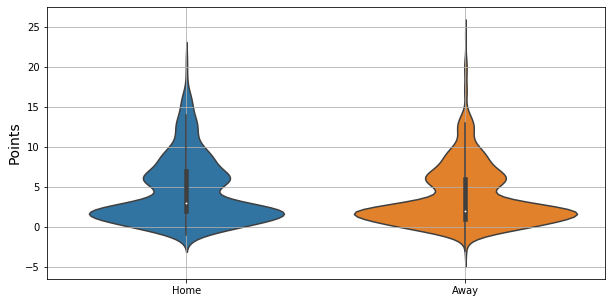

In [403]:
#This script will only select players who averaged more than 50 points in the season
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#Load data
player_data = pd.read_csv('C:/Users/ucapy/OneDrive - University College London/Documents/python_scripts/fantasy_PL/fantasy_master/Fantasy-Premier-League-master/data/2019-20/gws/merged_gw.csv')
overall_season_data = pd.read_csv('C:/Users/ucapy/OneDrive - University College London/Documents/python_scripts/fantasy_PL/fantasy_master/Fantasy-Premier-League-master/data/2019-20/cleaned_players.csv')

#set cut off
point_cut_off = 130
temp = overall_season_data[overall_season_data['total_points'] > point_cut_off]

#create new column with split name
player_data['split_name'] = player_data['name'].str.split('_')

#init for loop
count = 0
home_points = pd.DataFrame([])
away_points = pd.DataFrame([])

#loop over all player data comparing surname to surname of players > point_cut_off
for i in range(0,round(len(player_data)/1)):
    for k in range(0,round(len(temp)/1)):
        if player_data['split_name'][i][1] == temp['second_name'].iloc[k]:
            count += 1
            if player_data['was_home'].iloc[i]:
                add_val = pd.DataFrame([player_data['total_points'][i]])
                home_points = pd.concat([home_points,add_val],ignore_index=True)
            else:
                add_val = pd.DataFrame([player_data['total_points'][i]])
                away_points = pd.concat([away_points,add_val],ignore_index=True)

#Collapse into one df, rename df
home_points['Away'] = away_points
home_points.columns = ['Home', 'Away']

#plot
plt.figure(figsize=(10,5))
ax = sns.violinplot(data=home_points)
plt.ylabel('Points',FontSize =14)
plt.grid()



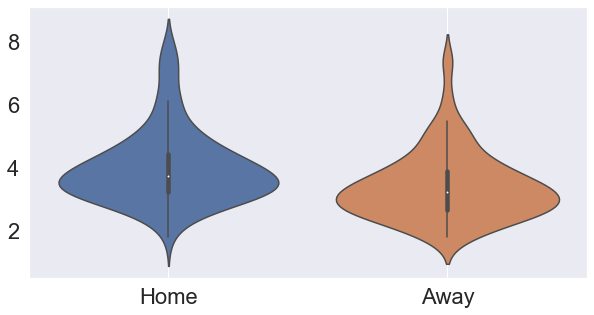

In [446]:
#home vs away whilst meaning each players season results
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#Load data
player_data = pd.read_csv('C:/Users/ucapy/OneDrive - University College London/Documents/python_scripts/fantasy_PL/fantasy_master/Fantasy-Premier-League-master/data/2019-20/gws/merged_gw.csv')
overall_season_data = pd.read_csv('C:/Users/ucapy/OneDrive - University College London/Documents/python_scripts/fantasy_PL/fantasy_master/Fantasy-Premier-League-master/data/2019-20/cleaned_players.csv')

#set cut off
point_cut_off = 100
temp = overall_season_data[overall_season_data['total_points'] > point_cut_off]

#create new column with split name
player_data['split_name'] = player_data['name'].str.split('_')

#init for loop
count = 0
d_init = {'Points': np.zeros(len(temp))}
home_points = pd.DataFrame(data = d_init)
away_points = pd.DataFrame(data = d_init)

#loop over all player data comparing surname to surname of players > point_cut_off
for i in range(0,round(len(player_data)/1)):
    for k in range(0,round(len(temp)/1)):
        if player_data['split_name'][i][1] == temp['second_name'].iloc[k]:
            count += 1
            if player_data['was_home'].iloc[i]:
                add_val = player_data['total_points'][i]
                home_points.loc[k] += add_val
            else:
                add_val = player_data['total_points'][i]
                away_points.loc[k] += add_val

away_points = away_points/19
home_points = home_points/19

#Collapse into one df, rename df
home_points['Away'] = away_points
home_points.columns = ['Home', 'Away']

#plot
plt.figure(figsize=(10,5))
#sns.set(font_scale=2)
ax = sns.violinplot(data=home_points, linewidth= 1.5)
#plt.ylabel('Points',FontSize =14)
plt.grid()